---
title: Identifying type I and type II FRB 
subtitle: Extending the work of [@pleunis_FastRadioBurst_2021]
author: Murthadza Aznam
date: '2023-03-20'
bibliography: references.bib
---

:::{.callout-note}

 📌 Goal: This notebook tries to differentiate between broadband and shortband single peak fast radio burst, as described in [@pleunis_FastRadioBurst_2021].

:::

In [19]:
import pandas as pd
import numpy as np
import scipy

In [20]:
from pathlib import Path
from sarjana.signal import is_multipeak

catalog_file = Path('D://', 'home', 'datasets', 'sarjana', 'raw', 'cfod', 'chimefrb_profile_norfi.parquet')

catalog = pd.read_parquet(catalog_file)

# Resize time
catalog['plot_time'] = catalog['plot_time'] - (catalog['dt'] / 2)

catalog["multipeak"] = [is_multipeak(x.copy()) for x in catalog["ts"].values]
single_peaks = catalog[catalog["multipeak"] == False]


In [21]:
single_file = Path('D://', 'home', 'datasets', 'sarjana', 'raw', 'wfall', 'FRB20190701E_waterfall.h5.parquet')
pd.read_parquet(single_file)

,eventname,wfall,model_wfall,plot_time,plot_freq,ts,model_ts,spec,model_spec,extent,dm,scatterfit,dt,wfall_shape,cal_wfall_shape,cal_wfall
0,FRB20190701E,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.4915200115647167, 1.47456003469415, 2.45760...","[400.2197265625, 400.244140625, 400.2685546875...","[1.0231140851974487, 3.072990357875824, -16.58...","[0.00011334415066438012, 0.0001133441506643801...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.002127421250213523, 0.002127393305711726, 0...","[0.0, 37.35552087891847, 400.20751953125, 800....",890.477065,True,0.98304,"[16384, 38]",None,None


In [22]:
single_peaks

,filename,eventname,plot_time,plot_freq,ts,model_ts,spec,model_spec,extent,dm,scatterfit,dt,multipeak
2,FRB20180729A_waterfall.h5.parquet,FRB20180729A,"[0.0, 0.9830399649217725, 1.966079929843545, 2...","[400.2197265625, 400.244140625, 400.2685546875...","[-0.5716363191604614, -17.364217936992645, 5.2...","[0.0030962208788418173, 0.0030962208788418173,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.00416778773145504, 0.0041719751674474635, 0...","[0.0, 18.677759333513677, 400.20751953125, 800...",109.594181,True,0.98304,False
3,FRB20180729B_waterfall.h5.parquet,FRB20180729B,"[0.0, 0.9830400231294334, 1.9660800462588668, ...","[400.2197265625, 400.244140625, 400.2685546875...","[7.178313672542572, 16.028381049633026, -12.85...","[0.00022216660293127358, 0.0002221666029312735...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.113813866711855e-05, 4.117462640763476e-05,...","[0.0, 37.35552087891847, 400.20751953125, 800....",317.223506,True,0.98304,False
4,FRB20180730A_waterfall.h5.parquet,FRB20180730A,"[0.0, 0.9830399649217725, 1.966079929843545, 2...","[400.2197265625, 400.244140625, 400.2685546875...","[28.190669357776642, -3.8035714626312256, 1.37...","[0.0003526762730453472, 0.0003526762730453472,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.009713658938378366, 0.009784989753700499, 0...","[0.0, 37.355518667027354, 400.20751953125, 800...",848.904087,True,0.98304,False
8,FRB20180810B_waterfall.h5.parquet,FRB20180810B,"[0.0, 0.9830400813370943, 1.9660801626741886, ...","[400.2197265625, 400.244140625, 400.2685546875...","[11.590367555618286, -0.7796801924705505, 3.87...","[0.000770837060045753, 0.000770837060045753, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.012395891508303704, 0.01239529586531048, 0....","[0.0, 18.677761545404792, 400.20751953125, 800...",169.138526,True,0.98304,False
10,FRB20180814B_waterfall.h5.parquet,FRB20180814B,"[0.0, 0.9830399940256029, 1.9660799880512059, ...","[400.2197265625, 400.244140625, 400.2685546875...","[13.435711920261383, -34.95270961523056, 8.021...","[5.823073060752974e-49, 7.408350751003518e-41,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0016093394878410432, 0.001609342656825253, ...","[0.0, 37.35551977297291, 400.20751953125, 800....",238.347359,False,0.98304,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,FRB20190623B_waterfall.h5.parquet,FRB20190623B,"[0.0, 0.9830399976635817, 1.9660799953271635, ...","[400.2197265625, 400.244140625, 400.2685546875...","[-7.816261172294617, 6.107970714569092, 9.2511...","[0.00034190650261076047, 0.0003419065026107604...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.0068020284278203e-08, 1.0101373999610491e-0...","[0.0, 37.355519911216106, 400.20751953125, 800...",1556.765041,True,0.98304,False
574,FRB20190624B_waterfall.h5.parquet,FRB20190624B,"[0.0, 0.9830399976635817, 1.9660799953271635, ...","[400.2197265625, 400.244140625, 400.2685546875...","[-5.652332425117493, 23.393622279167175, 7.056...","[6.59608089425059e-43, 4.5865270761136985e-28,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.1669434356811494e-05, 1.1517735828296239e-0...","[0.0, 18.677759955608053, 400.20751953125, 800...",213.922189,False,0.98304,False
580,FRB20190625D_waterfall.h5.parquet,FRB20190625D,"[0.0, 0.9830399940256029, 1.9660799880512059, ...","[400.2197265625, 400.244140625, 400.2685546875...","[-16.88565695285797, 33.844458281993866, -9.81...","[1.601867475081894e-60, 1.6198470221664263e-50...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.003710013880471254, 0.003714563006853791, 0...","[0.0, 37.35551977297291, 400.20751953125, 800....",717.883116,False,0.98304,False
583,FRB20190627B_waterfall.h5.parquet,FRB20190627B,"[0.0, 0.9830399940256029, 1.9660799880512059, ...","[400.2197265625, 400.244140625, 400.2685546875...","[2.3288493752479553, 18.383675038814545, -2.34...","[0.0006036649558608276, 0.0006036649558608276,...","[nan, nan, nan, nan, nan, n

In [23]:
def gauss(time: np.ndarray, sigma: float, amplitude: float = 1.0, peak_time: float = 0.0):
    return amplitude * np.exp(-((time - peak_time) ** 2) / (2 * sigma**2))

In [24]:
def scattered_gaussian_signal(
    time: np.ndarray,
    sigma: float,
    tau: float,
    amplitude: float = 1.0,
    peak_time: float = 0.0,
) -> np.ndarray:
    _time = time - peak_time
    first_term: np.ndarray = -(_time / tau) + (sigma**2) / (2 * (tau**2))
    second_term: np.ndarray = (_time / (np.sqrt(2) * sigma)) - (
        sigma / (np.sqrt(2) * tau)
    )
    return amplitude * 0.5 * np.exp(first_term) * (1 + scipy.special.erf(second_term))

In [25]:
from typing import Callable
from sarjana.optimize import fit_time_series

def generate_single_peak_model(data: pd.DataFrame, func: Callable) -> pd.DataFrame:
    def try_fit(func, data) -> dict:
        try:
            return fit_time_series(
                func,
                data["plot_time"],
                data["ts"],
                params={
                    "amplitude": data["ts"].max(),
                    "peak_time": data["plot_time"][data["ts"].argmax()],
                },
            )
        except RuntimeError:
            return fit_time_series(
                func,
                data["plot_time"],
                data["model_ts"],
                params={
                    "amplitude": data["model_ts"].max(),
                    "peak_time": data["plot_time"][data["model_ts"].argmax()],
                },
            )

    data[func.__name__] = data.apply(
        lambda x: try_fit(func, x), axis="columns"
    )
    return data

In [26]:
df1 = generate_single_peak_model(single_peaks, scattered_gaussian_signal)
df1 = generate_single_peak_model(df1, gauss)

d:\home\lab\sarjana\.venv\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
D:\home\lab\sarjana\sarjana\optimize.py:27: RuntimeWarning: invalid value encountered in sqrt
  _stdevs = np.sqrt(np.diag(_pcov))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13784\3695975889.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[func.__name__] = data.apply(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13784\3695975889.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [27]:
data = df1[['eventname', 'dm', 'scattered_gaussian_signal', 'gauss']]
data['log_scattered_sigma']     = data['scattered_gaussian_signal'].apply(lambda x: np.log(x.get('sigma', 0)[0]))
data['log_scattered_sigma_err'] = data['scattered_gaussian_signal'].apply(lambda x: np.log(x.get('sigma', 0)[1]))
data['log_scattered_tau']       = data['scattered_gaussian_signal'].apply(lambda x: np.log(x.get('tau', 0)[0]))
data['log_scattered_tau_err']   = data['scattered_gaussian_signal'].apply(lambda x: np.log(x.get('tau', 0)[1]))
data['log_gauss_sigma']         = data['gauss'].apply(lambda x: np.log(x.get('sigma', 0)[0]))
data['log_gauss_sigma_err']     = data['gauss'].apply(lambda x: np.log(x.get('sigma', 0)[1]))
data['log_sigma_ratio']         = data['log_gauss_sigma']/data['log_scattered_sigma']
data['log_sigma_per_tau']       = data['log_scattered_sigma']/data['log_scattered_tau']
data['log_sigma_err_ratio']       = (data['log_scattered_sigma_err']-data['log_gauss_sigma_err'])/data['log_scattered_sigma_err']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13784\1968355826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_scattered_sigma']     = data['scattered_gaussian_signal'].apply(lambda x: np.log(x.get('sigma', 0)[0]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13784\1968355826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_scattered_sigma_err'] = data['scattered_gaussian_signal'].apply(lambda x: np.log(x.get('sigma', 0)[1]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13784\19683

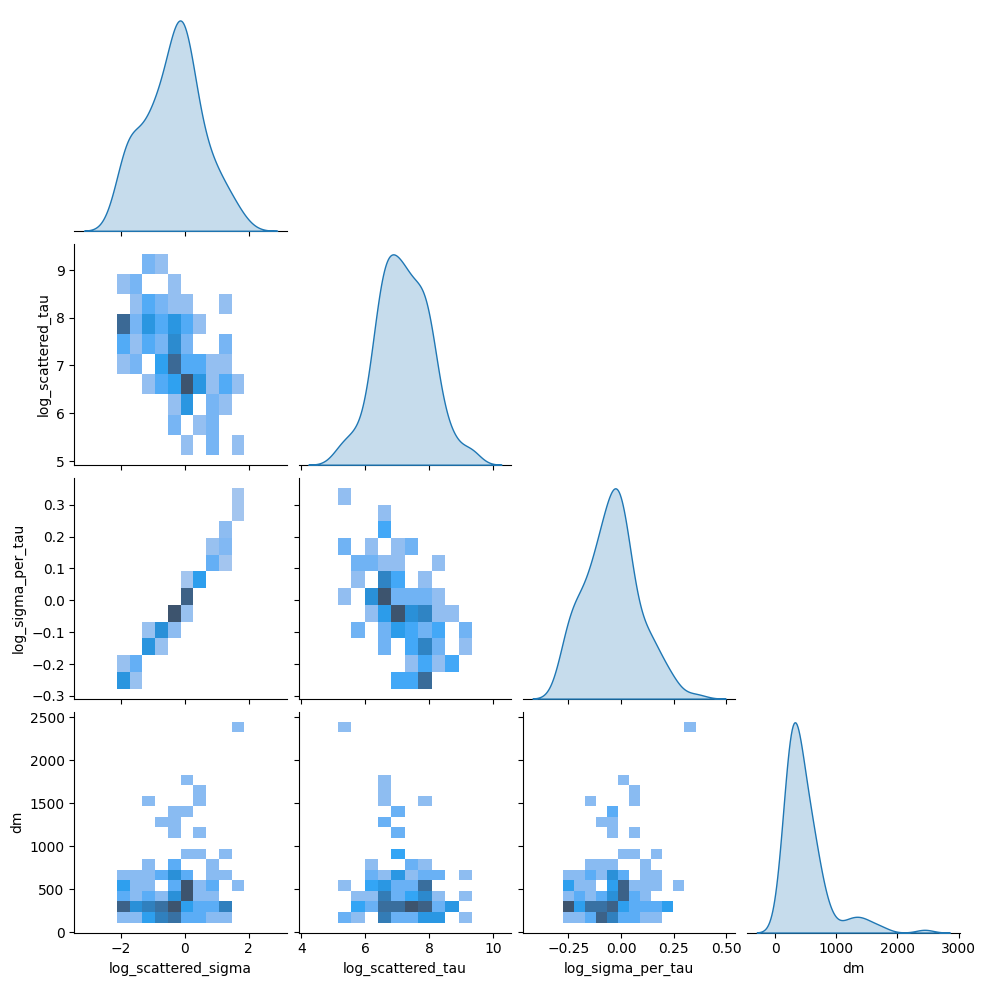

In [28]:
import seaborn as sns
g = sns.pairplot(data, vars=['log_scattered_sigma', 'log_scattered_tau', 'log_sigma_per_tau', 'dm'], corner=True, diag_kind='kde', kind='hist')
# g.set(xscale="log", yscale="log")

In [29]:
sns.histplot(data, x='scattered_sigma', y='scattered_tau')

ValueError: Could not interpret value `scattered_sigma` for parameter `x`